#Setup


Make sure that sklearn version is 0.24

In [1]:
# !pip install --user --upgrade scikit-learn==0.24
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.0.


In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sb

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#Get the data


Data Description

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

Source: https://www.kaggle.com/prasadperera/the-boston-housing-dataset/data?select=housing.csv

In [3]:
import requests
r = requests.get('https://raw.github.com/ngoeldner/Machine-Learning-Summer-Course-/master/boston_housing.csv')

In [4]:
f = open('/boston_housing.csv','wb')
f.write(r.content)

40363

In [5]:
data = pd.read_csv('/boston_housing.csv', index_col=0)

In [6]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

#Data Analysis

In this part, we take a quick glance at the whole dataset, then split it and look more carefully at the train dataset.  

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 59.3 KB


In [10]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8);

In [12]:
data_X_train = pd.DataFrame( data= X_train, columns=X.columns, index=X.index)
data_y_train = pd.DataFrame( data= y_train, columns=['MEDV'], index=X.index)

In [13]:
data_train = pd.concat([data_X_train, data_y_train], axis=1)

In [14]:
data_train.dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9


In [15]:
data_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.386324,11.794554,11.123441,0.069307,0.555886,6.301797,69.027228,3.770242,9.403465,402.844059,18.462376,358.785446,12.706188,22.611881
std,8.137943,23.636906,6.993011,0.254290,0.115201,0.694692,28.106955,2.080583,8.661147,170.857022,2.194821,88.663438,7.299031,9.238777
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.078935,0.000000,5.130000,0.000000,0.449000,5.887750,45.675000,2.087875,4.000000,276.000000,17.400000,376.132500,6.727500,16.775000
50%,0.256510,0.000000,9.125000,0.000000,0.538000,6.211000,77.950000,3.190950,5.000000,322.000000,19.100000,391.600000,11.300000,21.400000
75%,3.359358,20.000000,18.100000,0.000000,0.631000,6.675000,93.900000,5.141475,24.000000,666.000000,20.200000,396.060000,17.112500,25.525000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


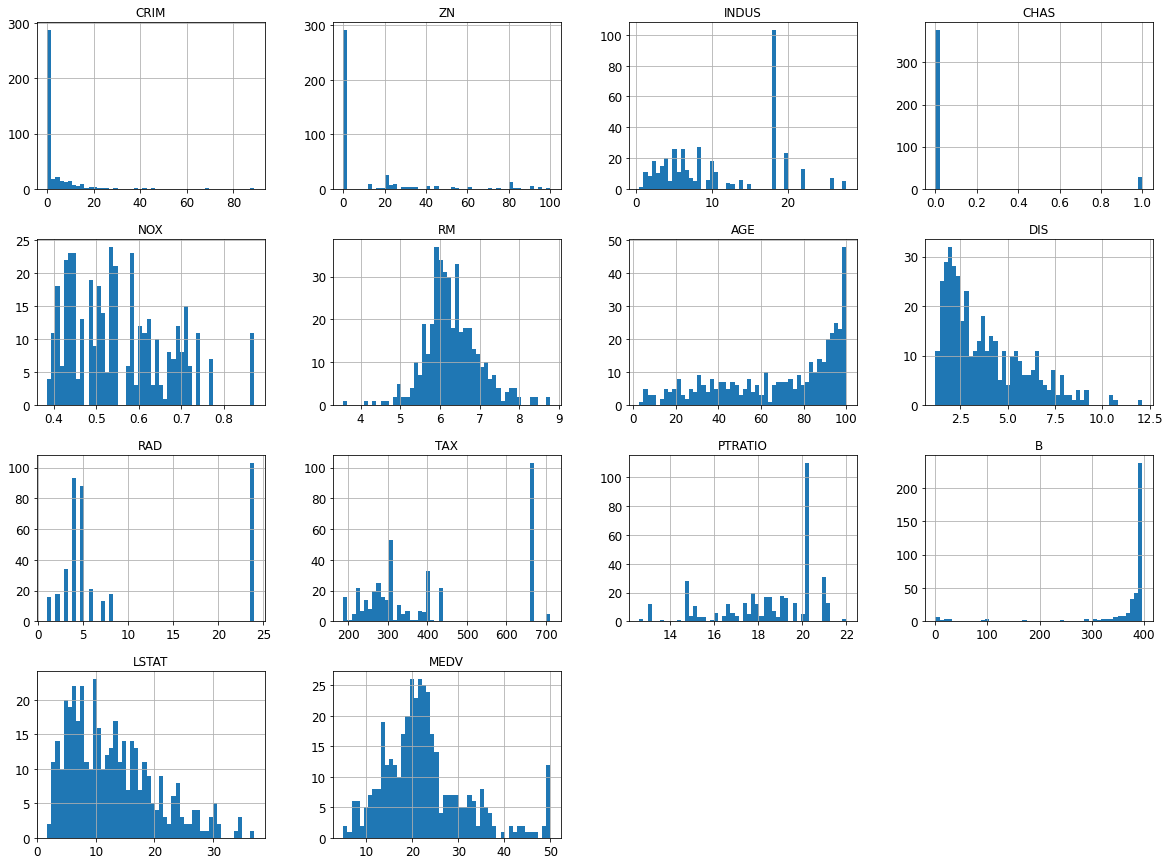

In [16]:
%matplotlib inline
data_train.hist(bins=50, figsize=(20,15))
plt.show()

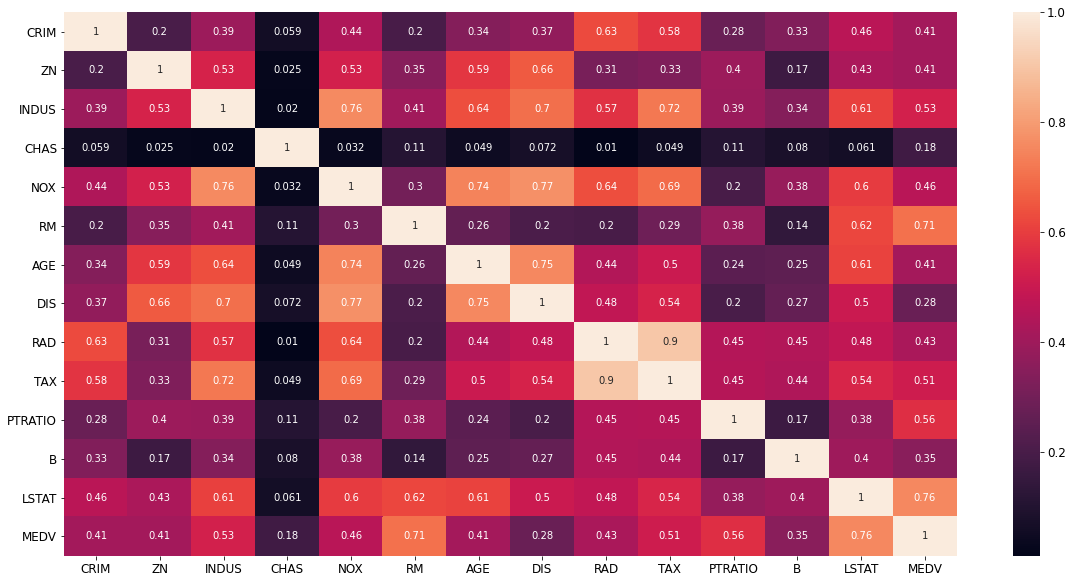

In [17]:
plt.figure(figsize=(20, 10))
sb.heatmap(data_train.corr().abs(),  annot=True)

#Data Preprocessing

Here, we standardize the features for the SVM.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
stdScaler = StandardScaler()
X_train_scaled = stdScaler.fit_transform(X_train)
X_train_scaled

array([[-0.37257438, -0.49960763, -0.70492455, ..., -0.48463784,
         0.3716906 , -0.41100022],
       [-0.39709866, -0.49960763, -0.04487755, ...,  0.33649132,
         0.20501196, -0.38768057],
       [-0.402693  ,  0.77116771, -0.88675963, ..., -0.84958414,
         0.36660893, -0.18191902],
       ...,
       [-0.39805586, -0.49960763, -0.15941933, ..., -0.30216469,
         0.40342278, -0.33006734],
       [-0.38842357, -0.49960763, -0.60326872, ..., -0.25654641,
         0.38343489,  0.8359148 ],
       [-0.39951258, -0.49960763, -1.01275558, ..., -0.84958414,
         0.43041207,  0.27212814]])

#Model Training

In this part, we train different models using the GridSearchCV to search for the best hyperparameters. Since the dataset is not very large, we can test many combinations of hyperparameters for each model.

In [20]:
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR, SVR

##ElasticNet

In [21]:
parameters = {'l1_ratio':[.1, .5, .7, .9, .95, .99, 1], 'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100]}
el_net = ElasticNet(random_state=0)
el_net_gscv = GridSearchCV(estimator=el_net, param_grid=parameters, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

In [22]:
el_net_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=0), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [23]:
print(el_net_gscv.best_estimator_)
print(el_net_gscv.best_score_)

ElasticNet(alpha=0.0001, l1_ratio=0.1, random_state=0)
-21.396419889972144


##SVM
---



###Linear

In [24]:
parameters = {'loss':['squared_epsilon_insensitive'], 'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
lin_svr = LinearSVR(dual=False, random_state=0)
lin_svr_gscv = GridSearchCV(estimator=lin_svr, param_grid=parameters, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

In [25]:
lin_svr_gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(dual=False, random_state=0), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000],
                         'loss': ['squared_epsilon_insensitive']},
             scoring='neg_mean_squared_error')

In [26]:
print(lin_svr_gscv.best_estimator_)
print(lin_svr_gscv.best_score_)

LinearSVR(C=1, dual=False, loss='squared_epsilon_insensitive', random_state=0)
-21.395194692932353


###Nonlinear

In [27]:
parameters = [{'kernel':['poly'],    'C':[0.001,0.01,0.1,1,10,100,300], 'degree':[2,3,4,5,6,7,8]},
              {'kernel':['rbf'],     'C':[0.001,0.01,0.1,1,10,100,300]},
              {'kernel':['sigmoid'], 'C':[0.001,0.01,0.1,1,10,100,300]}
              ]
nlin_svr = SVR()
nlin_svr_gscv = GridSearchCV(estimator=nlin_svr, param_grid=parameters, n_jobs=-1, cv=10, scoring='neg_mean_squared_error', verbose=3)

In [28]:
nlin_svr_gscv.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 63 candidates, totalling 630 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 300],
                          'degree': [2, 3, 4, 5, 6, 7, 8], 'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 300],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 300],
                          'kernel': ['sigmoid']}],
             scoring='neg_mean_squared_error', verbose=3)

In [29]:
print(nlin_svr_gscv.best_params_)
print(nlin_svr_gscv.best_score_)

{'C': 100, 'kernel': 'rbf'}
-10.402303703417589


##Random Forest

In [30]:
parameters = {'max_leaf_nodes':[10,20,40,50,70, 90, 100, 120, 140, 160, 180, 200, 240]}
rf = RandomForestRegressor(random_state=0)  
rf_gscv = GridSearchCV(estimator=rf, param_grid=parameters, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

In [31]:
rf_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_leaf_nodes': [10, 20, 40, 50, 70, 90, 100, 120,
                                            140, 160, 180, 200, 240]},
             scoring='neg_mean_squared_error')

In [32]:
print(rf_gscv.best_estimator_)
print(rf_gscv.best_score_)

RandomForestRegressor(max_leaf_nodes=200, random_state=0)
-10.573596204013189


##Extra-Trees

In [33]:
parameters = {'max_leaf_nodes':[10,20,40,50,70, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]}
et = ExtraTreesRegressor(random_state=0)  
et_gscv = GridSearchCV(estimator=et, param_grid=parameters, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

In [34]:
et_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_leaf_nodes': [10, 20, 40, 50, 70, 90, 100, 120,
                                            140, 160, 180, 200, 220, 240, 260,
                                            280, 300]},
             scoring='neg_mean_squared_error')

In [35]:
print(et_gscv.best_estimator_)
print(et_gscv.best_score_)

ExtraTreesRegressor(max_leaf_nodes=240, random_state=0)
-7.020912432394004


##Gradient Boosting

In [36]:
parameters = {'n_estimators':[400,450,500], 'max_depth':[2,3,4], 'learning_rate' : [0.1, 0.05]}
gb = GradientBoostingRegressor(random_state=0, loss='ls')  
gb_gscv = GridSearchCV(estimator=gb, param_grid=parameters,  n_jobs=-1, cv=10, scoring='neg_mean_squared_error', verbose=3)

In [37]:
gb_gscv.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [2, 3, 4],
                         'n_estimators': [400, 450, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [38]:
print(gb_gscv.best_params_)
print(gb_gscv.best_score_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400}
-7.807693552497399


#Model Selection and Final Evaluation

Here, we get the best model (in this case the Gradient Boosting) and evaluate it in the test dataset.

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
best_model = gb_gscv.best_estimator_

In [41]:
y_pred = best_model.predict(X_test)

In [42]:
mean_squared_error(y_test, y_pred)

15.999695002690785